# ResNet50 image embedding and similarity search

In [15]:
import os
import sys
from typing import (
    List,
    Dict,
    Tuple,
    Union,
)
import gc

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

%matplotlib inline

In [2]:
sys.path.append("../lib")
sys.path.append("../config")

In [3]:
%load_ext autoreload
%autoreload 2

from util_opencv.image import (
    validate_image,
    get_image,
    save_image,
    get_image_dimensions,
    resize_image,
    show_image,
    show_image_opencv,
    read_and_process_images,
    convert_bgr_to_rgb,
    convert_rgb_to_bgr,
    resize
)
from util_numpy import (
    get_cosine_similarity,
    save,
    load,
)
from function import (
    ARG_LOG_LEVEL,
    ARG_SOURCE_DIR,
    ARG_TARGET_DIR,
    ARG_TARGET_FILE,
)
from util_tf.resnet50 import (
    RESNET50_IMAGE_HEIGHT,
    RESNET50_IMAGE_WIDTH,
    preprocess_rgb_image_for_resnet
)
from config import (
    # Master
    DIR_DATA_MASTER,

    # Lansing
    DIR_DATA_LANDING,
    FILENAME_NPY_RESIZED_RGB,
    FILENAME_NPY_IMAGE_NAMES,

    # Feature Engineering
    # Modelling
    DIR_DATA_MODEL,
    FILENAME_NPY_IMAGE_VECTORS,
    TF_VECTORIZER_MODEL,
)
from etl import (
    ETL
)
from feature_engineering import (
    FeatureEngineering
)
from serve import (
    ImageSearchEngine,
    display_images,
)

# Resized RGB Images



In [4]:
resized_rgb_images: np.ndarray = np.load(file=os.sep.join([DIR_DATA_LANDING, FILENAME_NPY_RESIZED_RGB]))
image_names: np.ndarray = np.load(file=os.sep.join([DIR_DATA_LANDING, FILENAME_NPY_IMAGE_NAMES]))
image_vectors: np.ndarray = np.load(file=os.sep.join([DIR_DATA_MODEL, FILENAME_NPY_IMAGE_VECTORS]))

resized_rgb_images.shape

(4031, 224, 224, 3)

In [5]:
np.nonzero(np.in1d(ar1=image_names, ar2=["04000.jpg"]))[0][0]

3998

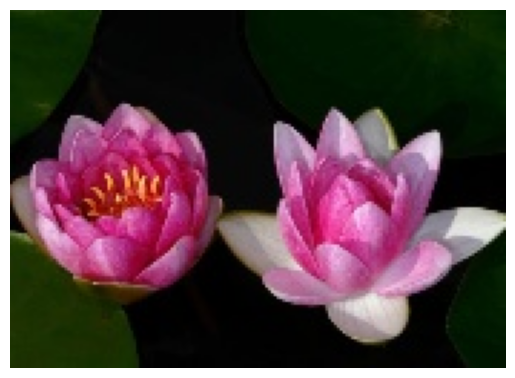

In [6]:
image = get_image(path=os.sep.join([DIR_DATA_MASTER, "04000.jpg"]))
show_image(image)

---

# Image Search

In [7]:
engine: ImageSearchEngine = ImageSearchEngine(
    image_vectors=image_vectors,
    path_to_vectorizer_model=os.sep.join([DIR_DATA_MODEL, TF_VECTORIZER_MODEL]),
    images=resized_rgb_images,
    image_names=image_names
)

In [8]:
scores: List[float] = []
names: List[str] = []

for score, name in engine.most_similar(query=image, n=5):
    scores.append(float(score))
    names.append(str(name))

names

2023-01-27 11:25:37.797608: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 1s 651ms/step


['04000.jpg', '04001.jpg', '04028.jpg', '03099.jpg', '04004.jpg']

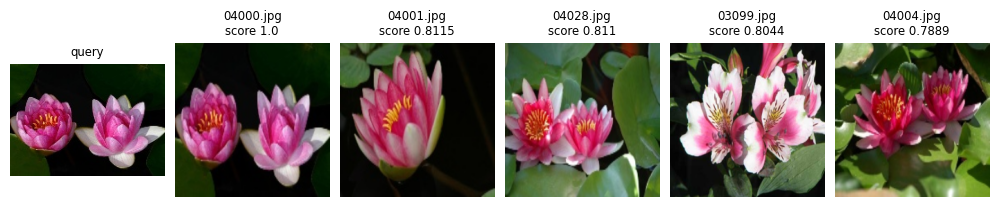

In [9]:
images: np.ndarray = engine.get_images_for_names(names=names)
display_images(
    query=image,
    images=images,
    names=names,
    scores=scores
)

In [16]:
del images
del engine
gc.collect()

17474